In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Linear Regression

In [4]:
df=pd.read_csv("linear_data.csv")

In [5]:
df

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101
...,...,...
495,9.91984,25.356174
496,9.93988,24.417804
497,9.95992,25.625916
498,9.97996,24.269704


In [6]:
x=df[['x']]

In [7]:
y=df['y']

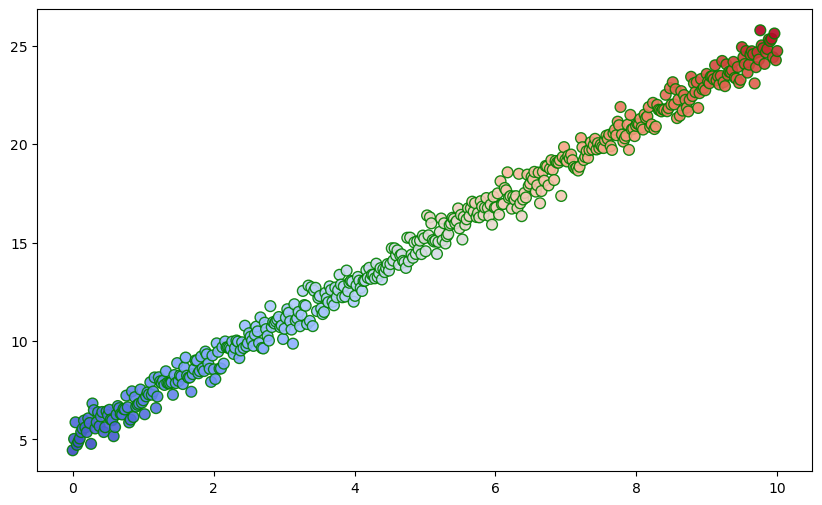

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'],
            df['y'],
            c=df['y'] ,
            cmap='coolwarm',
            s=60,
            alpha=.90,
            edgecolors='g',
             )

In [9]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


Non-Linear Regression

In [10]:
df2=pd.read_csv("nonlinear_data.csv")


In [11]:
x1=df2[['x']]

In [12]:
y1=df2['y']

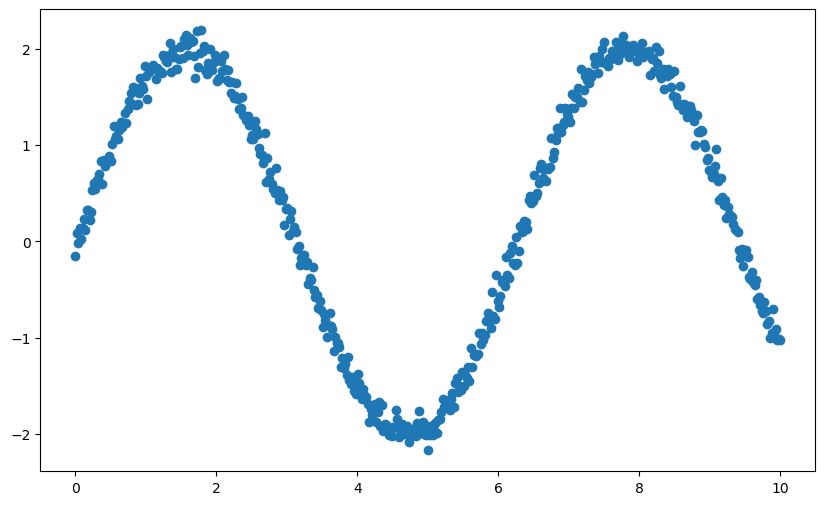

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df2['x'],df2['y'])

In [14]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


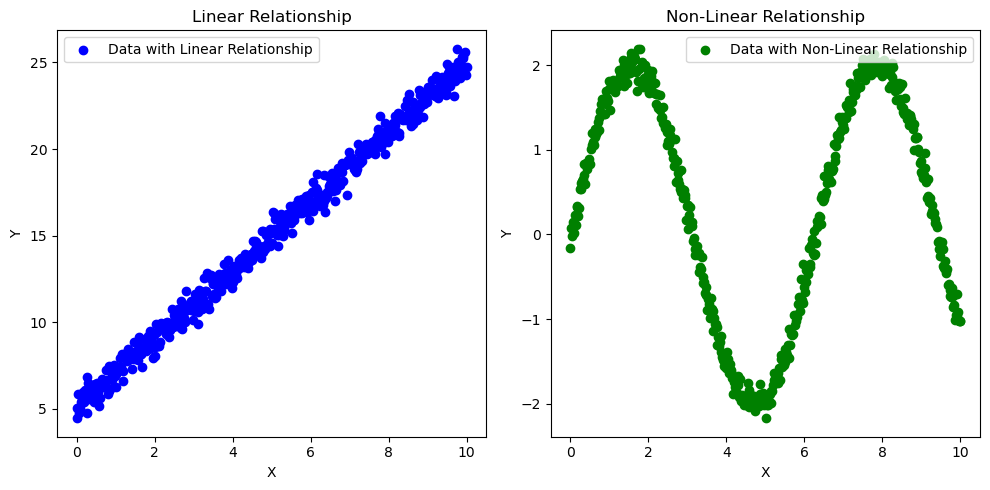

In [69]:
## Linear Relationship
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.scatter(df.x,df.y,color='blue',label='Data with Linear Relationship')
plt.title('Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

## Non-Linear Relationship
plt.subplot(1,2,2)
plt.scatter(df2.x,df2.y,color='green',label='Data with Non-Linear Relationship')
plt.title('Non-Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

Correlation Coefficients

In [16]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [17]:
corr1_another_way=np.corrcoef(df.x,df.y)

In [18]:
corr1_another_way

array([[1.        , 0.99643985],
       [0.99643985, 1.        ]])

In [19]:
corr2_another_way=np.corrcoef(df2.x,df2.y)[0,1]

In [20]:
corr2_another_way

-0.06573583283905123

In [21]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


Linear

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [24]:
reg1=LinearRegression()   ## Object create krsi linear regression er

In [25]:
reg1.fit(df[['x']],df['y']) # training

LinearRegression()

In [26]:
reg1.score(df[['x']],df['y'])   # training score

0.9928923730526016

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(df['y'],reg1.predict(df[['x']]))

0.9928923730526016

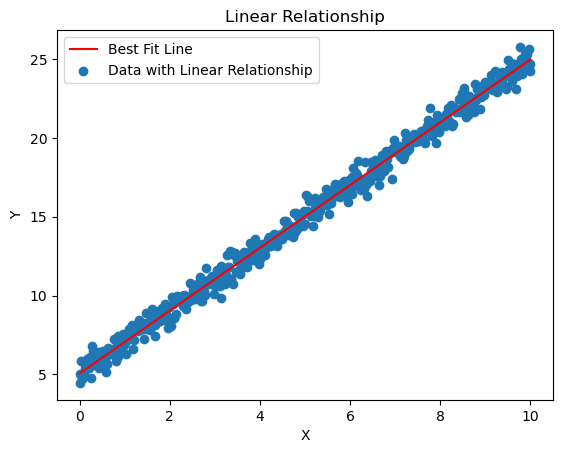

In [29]:
plt.plot(df[['x']],reg1.predict(df[['x']]),color='red',label='Best Fit Line')

plt.scatter(df['x'],df['y'],label='Data with Linear Relationship')
plt.title("Linear Relationship")
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

Non-Linear

In [30]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [31]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [32]:
np.corrcoef(df2['x'],df2['y'])

array([[ 1.        , -0.06573583],
       [-0.06573583,  1.        ]])

In [33]:
reg2=LinearRegression()

In [34]:
reg2.fit(df2[['x']],df2['y'])  ## training

LinearRegression()

In [35]:
reg2.score(df2[['x']],df2['y'])  ## trainig score

0.004321199719043767

In [36]:
reg2.score(df2[['x']],df2['y'])*100

0.4321199719043767

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(df2['y'],reg2.predict(df2[['x']]))

0.004321199719043767

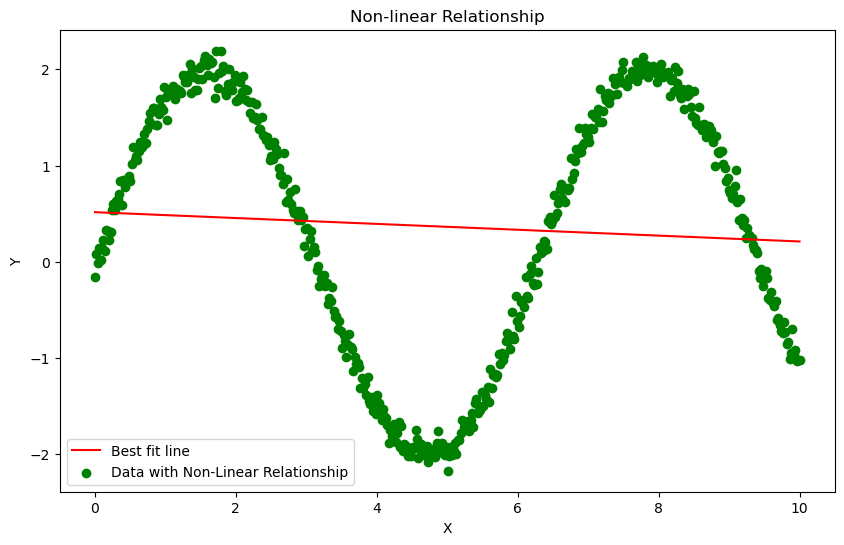

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df2['x'],reg2.predict(df2[['x']]),c='red',label='Best fit line')

plt.scatter(df2['x'],df2['y'],color='green',label='Data with Non-Linear Relationship')
plt.title("Non-linear Relationship")
plt.xlabel("X")
plt.ylabel("Y")

plt.legend()
plt.show()

Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly=PolynomialFeatures(degree=(6))

In [42]:
x_poly=poly.fit_transform(df2[['x']])

In [43]:
x_poly.shape

(500, 7)

In [44]:
x_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00400802e-02, 4.01604813e-04, ...,
        1.61286426e-07, 3.23219290e-09, 6.47734048e-11],
       [1.00000000e+00, 4.00801603e-02, 1.60641925e-03, ...,
        2.58058281e-06, 1.03430173e-07, 4.14549791e-09],
       ...,
       [1.00000000e+00, 9.95991984e+00, 9.92000032e+01, ...,
        9.84064064e+03, 9.80119919e+04, 9.76191583e+05],
       [1.00000000e+00, 9.97995992e+00, 9.95996000e+01, ...,
        9.92008032e+03, 9.90020040e+04, 9.88036032e+05],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, ...,
        1.00000000e+04, 1.00000000e+05, 1.00000000e+06]])

In [45]:
pd.DataFrame(x_poly)

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07
...,...,...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03,9.605573e+04,9.528574e+05
496,1.0,9.93988,98.801210,982.072144,9.761679e+03,9.702992e+04,9.644657e+05
497,1.0,9.95992,99.200003,988.024080,9.840641e+03,9.801199e+04,9.761916e+05
498,1.0,9.97996,99.599600,994.000016,9.920080e+03,9.900200e+04,9.880360e+05


In [46]:
df2.x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

Polynomial Regression= Poly Features + Linear Regression

In [47]:
reg_poly=LinearRegression()

In [48]:
reg_poly.fit(x_poly,df2.y)

LinearRegression()

In [49]:
reg_poly.score(x_poly,df2.y)

0.9930624844497352

In [50]:
r2_score(df2.y,reg_poly.predict(x_poly))

0.9930624844497352

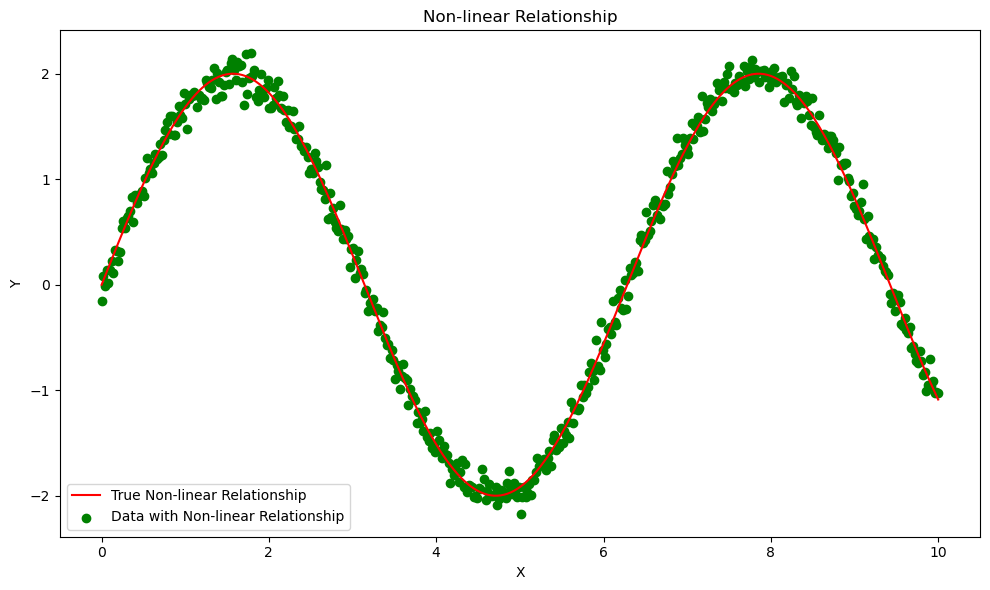

In [51]:
plt.figure(figsize=(10,6))

plt.plot(df2.x,2* np.sin(df2.x) ,color='red', label='True Non-linear Relationship')
plt.scatter(df2['x'],df2['y'],c='green',label='Data with Non-linear Relationship')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')

plt.legend()
plt.tight_layout()
plt.show()

Testing Overfit and Bestfit

In [52]:
from sklearn.model_selection import train_test_split

In [60]:
x_poly=pd.DataFrame(x_poly)

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x_poly,df2.y,train_size=0.75,random_state=10)

In [62]:
pd.DataFrame(xtrain)

,0,1,2,3,4,5,6
324,1.0,6.492986,42.158867,273.736931,1777.370053,11540.438818,74931.907356
252,1.0,5.050100,25.503512,128.795291,650.429126,3284.732260,16588.227044
441,1.0,8.837675,78.104506,690.262264,6100.313796,53912.592864,476461.993045
427,1.0,8.557114,73.224204,626.587877,5361.784040,45881.398495,392612.367881
70,1.0,1.402806,1.967864,2.760530,3.872487,5.432347,7.620526
...,...,...,...,...,...,...,...
320,1.0,6.412826,41.124333,263.723176,1691.210751,10845.439686,69549.913818
15,1.0,0.300601,0.090361,0.027163,0.008165,0.002454,0.000738
484,1.0,9.699399,94.078337,912.503309,8850.733499,85846.793860,832662.289146
125,1.0,2.505010,6.275075,15.719126,39.376569,98.638699,247.090930


In [63]:
pd.DataFrame(ytrain)

,y
324,0.421043
252,-1.921827
441,1.138101
427,1.417155
70,1.917274
...,...
320,0.128686
15,0.632665
484,-0.582487
125,1.100184


In [64]:
pd.DataFrame(xtest)

,0,1,2,3,4,5,6
151,1.0,3.026052,9.156991,27.709533,83.850490,253.735953,767.818214
424,1.0,8.496994,72.198907,613.473677,5212.682148,44292.128870,376349.952725
154,1.0,3.086172,9.524460,29.394124,90.715333,279.963153,864.014540
190,1.0,3.807615,14.497934,55.202553,210.190083,800.322961,3047.321894
131,1.0,2.625251,6.891940,18.093069,47.498840,124.696353,327.359162
...,...,...,...,...,...,...,...
295,1.0,5.911824,34.949659,206.616220,1221.478653,7221.166384,42690.262192
214,1.0,4.288577,18.391894,78.875056,338.261765,1450.661678,6221.274533
99,1.0,1.983968,3.936129,7.809153,15.493110,30.737833,60.982875
245,1.0,4.909820,24.106329,118.357727,581.115093,2853.170294,14008.551544


In [65]:
pd.DataFrame(ytest)

,y
151,0.064407
424,1.771817
154,0.109298
190,-1.311514
131,0.905826
...,...
295,-0.525974
214,-1.776217
99,1.939897
245,-1.980465


In [66]:
reg_poly.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
reg_poly.score(xtrain,ytrain)  ## training data --> training accuracy

0.9929212827493653

In [ ]:
reg_poly.score(xtest,ytest)    ## unseen/new data --> testing accuracy 

0.9933098163167541